In [16]:
import numpy as np
import argparse
import os
from datetime import datetime, time
import json
import glob
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score
import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
import itertools
from scipy import interp
import pandas as pd
import SimpleITK as sitk
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

def main(csv):
    df = pd.read_csv(csv)

    y_pred_arr = []
    y_true_arr = []
    dice_arr = []

    for i, row in df.iterrows():
        y_true = sitk.GetArrayFromImage(sitk.ReadImage(row["seg"]))
        prediction_path = os.path.join("/work/jprieto/data/remote/EGower/jprieto", row["prediction"])
        y_pred = sitk.GetArrayFromImage(sitk.ReadImage(prediction_path))
        
        if y_pred.shape[-1] == 4:
            y_pred = np.argmax(y_pred, axis=-1)

        y_pred = np.reshape(y_pred, -1)
        y_true = np.reshape(y_true, -1)

        y_pred_arr.extend(y_pred)
        y_true_arr.extend(y_true)

        jaccard = jaccard_score(y_true, y_pred, average=None)
        dice = 2.0*jaccard/(1.0 + jaccard)
        if(len(dice) == 4):
            dice_arr.append(dice)
        else:
            print("WTF!")
    
    return y_true_arr, y_pred_arr, dice_arr

In [8]:
y_true_arr, y_pred_arr, dice_arr = main("/work/jprieto/data/remote/EGower/jprieto/eyes_cropped_resampled_512_seg_test_torch_prediction.csv")

In [9]:
cnf_matrix = confusion_matrix(y_true_arr, y_pred_arr)
cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
print(cnf_matrix)
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print("True positive rate or sensitivity:", TPR)
print("True negative rate or specificity:", TNR)
print("Positive predictive value or precision:", PPV)
print("Negative predictive value:", NPV)
print("False positive rate or fall out", FPR)
print("False negative rate:", FNR)
print("False discovery rate:", FDR)
print("Overall accuracy:", ACC)

print(classification_report(y_true_arr, y_pred_arr))

jaccard = jaccard_score(y_true_arr, y_pred_arr, average=None)
print("jaccard score:", jaccard)
print("dice:", 2.0*jaccard/(1.0 + jaccard))


dice_arr = np.array(dice_arr)
print(dice_arr.shape)



[[9.92409629e-01 2.04446984e-03 2.88684809e-04 5.25721586e-03]
 [1.88042060e-02 9.32825401e-01 2.87189528e-02 1.96514405e-02]
 [4.65470054e-03 3.79252501e-02 9.45534982e-01 1.18850679e-02]
 [8.43930900e-02 1.85616665e-02 8.25874022e-03 8.88786503e-01]]
True positive rate or sensitivity: [0.99240963 0.9328254  0.94553498 0.8887865 ]
True negative rate or specificity: [0.96404933 0.98048954 0.98757787 0.98773543]
Positive predictive value or precision: [0.90197604 0.9409583  0.96208148 0.96024794]
Negative predictive value: [0.99738239 0.97767279 0.98194848 0.96382618]
False positive rate or fall out [0.03595067 0.01951046 0.01242213 0.01226457]
False negative rate: [0.00759037 0.0671746  0.05446502 0.1112135 ]
False discovery rate: [0.09802396 0.0590417  0.03791852 0.03975206]
Overall accuracy: [0.97113941 0.9685735  0.97706715 0.96299819]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99  74167394
         1.0       0.92      0.93      0

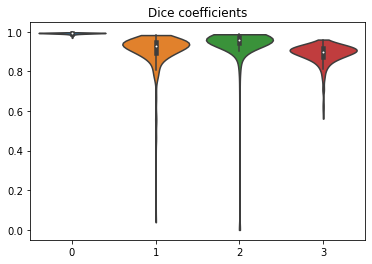

In [10]:
fig3 = plt.figure() 
# Creating plot
# np.save(os.path.splitext(args.csv)[0] + "_violin_plot.npy", dice_arr)
s = sns.violinplot(data=dice_arr, cut=0, scale="count")
# plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16"])
s.set_title('Dice coefficients')
plt.show()
# violin_filename = os.path.splitext(args.csv)[0] + "_violin_plot.png"
# fig3.savefig(violin_filename)

In [14]:
df = pd.read_csv("/work/jprieto/data/remote/EGower/jprieto/eyes_cropped_resampled_512_seg_test_torch_prediction.csv")

,img,seg,prediction
0,/work/jprieto/data/remote/EGower/jprieto/eyes_...,/work/jprieto/data/remote/EGower/jprieto/Segme...,segmentation_predict_torch_model01252022/11015...
1,/work/jprieto/data/remote/EGower/jprieto/eyes_...,/work/jprieto/data/remote/EGower/jprieto/Segme...,segmentation_predict_torch_model01252022/11047...
2,/work/jprieto/data/remote/EGower/jprieto/eyes_...,/work/jprieto/data/remote/EGower/jprieto/Segme...,segmentation_predict_torch_model01252022/11074...
3,/work/jprieto/data/remote/EGower/jprieto/eyes_...,/work/jprieto/data/remote/EGower/jprieto/Segme...,segmentation_predict_torch_model01252022/11079...
4,/work/jprieto/data/remote/EGower/jprieto/eyes_...,/work/jprieto/data/remote/EGower/jprieto/Segme...,segmentation_predict_torch_model01252022/11081...
...,...,...,...
335,/work/jprieto/data/remote/EGower/jprieto/eyes_...,/work/jprieto/data/remote/EGower/jprieto/Segme...,segmentation_predict_torch_model01252022/16073...
336,/work/jprieto/data/remote/EGower/jprieto/eyes_...,/work/jprieto/data/remote/EGower/jprieto/Segme...,segmentation_predict_torch_model01252022/16075...
337,/work/jprieto/data/remote/EGower/jprieto/eyes_...,/work/jprieto/data/remote/EGower/jprieto/Segme...,segmentation_predict_torch_model01252022/16079...
338,/work/jprieto/data/remote/EGower/jprieto/eyes_...,/work/jprieto/data/remote/EGower/jprieto/Segme...,segmentation_predict_torch_model01252022/16083...


In [37]:

fig = go.FigureWidget(make_subplots(rows=1, cols=2, column_widths=[0.5, 0.5], specs=[[{}, {}]]))
fig.add_trace(go.Scatter(x=np.arange(len(dice_arr)), y=dice_arr[:,3], mode='markers'))
fig.add_trace(go.Image(), row=1, col=2)


def update_study(trace, points, selector):
    if points.trace_name == 'trace 0' and len(points.point_inds) > 0:
        print("update_seg", points)
        idx = points.point_inds[0]  
        print(idx)

        with fig.batch_update():
            prediction_path = os.path.join("/work/jprieto/data/remote/EGower/jprieto", df.loc[idx].prediction)
            y_pred = sitk.GetArrayFromImage(sitk.ReadImage(prediction_path))
            
            img = sitk.GetArrayFromImage(sitk.ReadImage(df.loc[idx].img))
            print(img.shape)
#             if y_pred.shape[-1] == 4:
#                 y_pred = np.argmax(y_pred, axis=-1)
#             print(y_pred.shape)
            fig.data[1]['z'] = img


fig.data[0].on_click(update_study)

fig.update_layout(
    autosize=False,
    width=1200,
    height=800
)
fig

FigureWidget({
    'data': [{'mode': 'markers',
              'type': 'scatter',
              'uid': '46f3105…

(340, 4)